In [117]:
%matplotlib inline
import re
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
# Parse log data into a DataFrame
def parse_log(log_data):
    log_lines = log_data.strip().split('\n')
    log_entries = []

    for line in log_lines:
        match = re.match(r'(\S+) (\S+) (\S+):(\S+): (\S+): (.+)', line)
        if match:
            date, time, module, submodule, log_level, message = match.groups()
        else:
            match = re.match(r'(\S+) (\S+) ([^:]+): (\S+): (.+)', line)
            if match:
                date, time, module, log_level, message = match.groups()
                submodule = module
            else:
                continue

        log_entries.append({
            'timestamp': f"{date} {time}",
            'module': module,
            'submodule': submodule,
            'log_level': log_level,
            'message': message
        })

    return pd.DataFrame(log_entries)

In [119]:
file_path = 'assets/ossec.log'
with open(file_path, 'r') as f:
    log_data = f.read()
    
# Parsing the log data
log_df = parse_log(log_data)

In [120]:
log_df.sample()

,timestamp,module,submodule,log_level,message
477,2024/06/28 20:44:18,wazuh-modulesd,syscollector,INFO,Stop received for Syscollector.


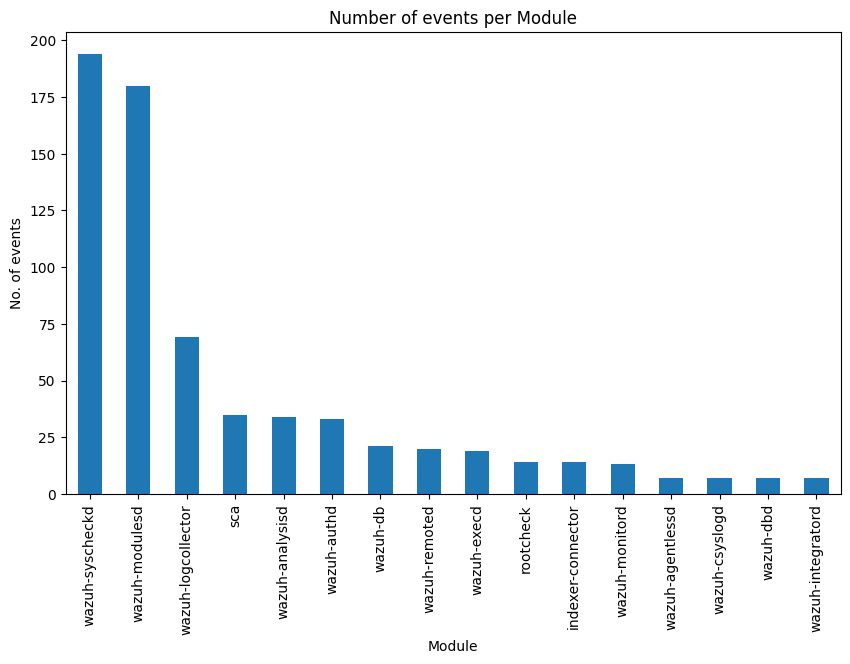

In [121]:
# Visualizes number of events per module
events = log_df['module'].value_counts()

# Bar graph
plt.figure(figsize=(10, 6))
events.plot(kind='bar')
plt.title("Number of events per Module")

plt.xlabel("Module")
plt.ylabel("No. of events")
plt.show()

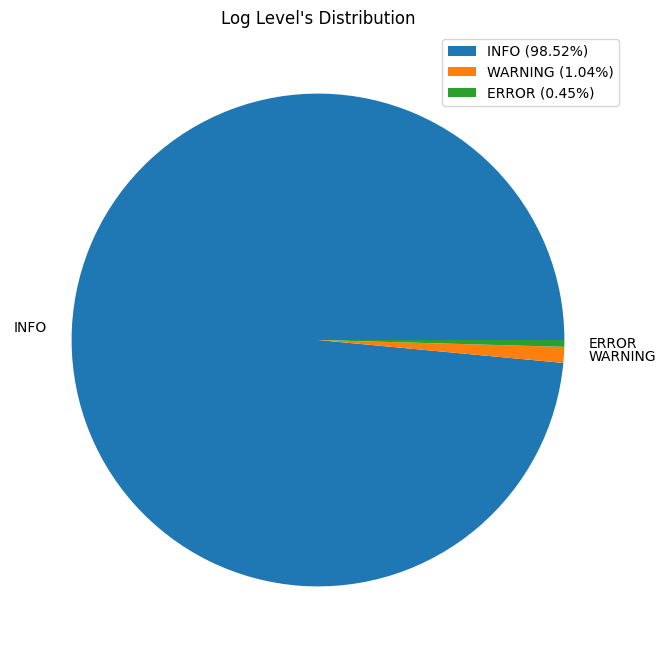

In [122]:
# Number of warning
levels = log_df['log_level'].value_counts()

# Calculate percentage
percent = levels/levels.sum() * 100

# Label with percentage
labels = [f"{level} ({percentage:.2f}%)" for level, percentage in zip(levels.index, percent)]

# Bar graph
plt.figure(figsize=(8, 8))
levels.plot(kind='pie')

plt.title("Log Level's Distribution")
plt.ylabel('')
plt.legend(labels, loc="upper right")
plt.show()